In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def read_in_data():
    data_dir = os.path.join("rundata", "local")
    data_files = os.listdir(data_dir)
    run_data = []
    for data_file in data_files:
        with open(os.path.join(data_dir, data_file), encoding="utf-8") as file:
            metadata = data_file[:-4].split("_")
            experiment_number = int(metadata[0][3:])
            number_runs = int(metadata[2])
            hadamard = len(metadata) == 4

            curr_data = np.zeros(number_runs)
            idx = 0
            for line in file.readlines():
                if "Error:" in line:
                    curr_data[idx] = float(line.split(" ")[2])
                    idx += 1
            
            run_data.append({
                "experiment_number": experiment_number,
                "number_runs": number_runs,
                "hadamard": hadamard,
                "data": curr_data
            })
    return run_data

exp_names = ['000, 001', '000, 110', '000, 111', '000, 010, 100', '000, 010, 110', '000, 011, 110', 'General Unitary']

def plot_experiments(run_data):
    # Group data by experiment number
    grouped_data = {}
    for run in run_data:
        exp_num = run['experiment_number']
        key = (exp_num, run['hadamard'])
        if key not in grouped_data:
            grouped_data[key] = []
        grouped_data[key].extend(run['data'])

        # Create box and whisker plots
    for exp_num in set(key[0] for key in grouped_data):
        hadamard_data = grouped_data.get((exp_num, True), [])
        no_hadamard_data = grouped_data.get((exp_num, False), [])

        if not hadamard_data or not no_hadamard_data:  # Skip if one of the data sets is empty
            continue

        data_to_plot = [hadamard_data, no_hadamard_data]

        plt.boxplot(data_to_plot, labels=['Hadamard', 'No Hadamard'])
        plt.ylabel('Error Percentage')
        plt.title(f'Experiment {exp_names[exp_num - 1]} Comparison')
        plt.show()


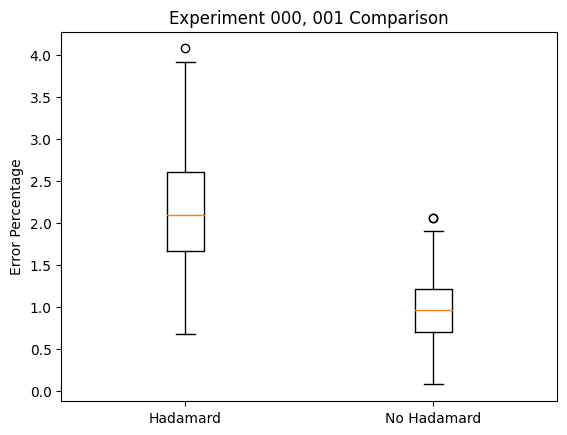

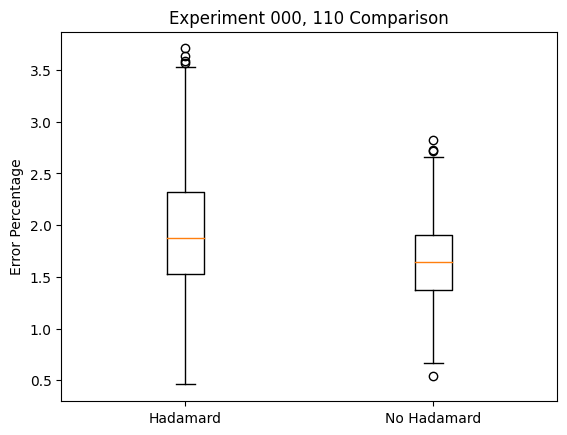

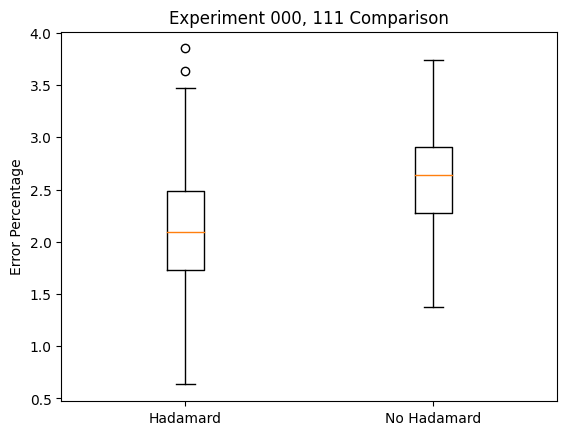

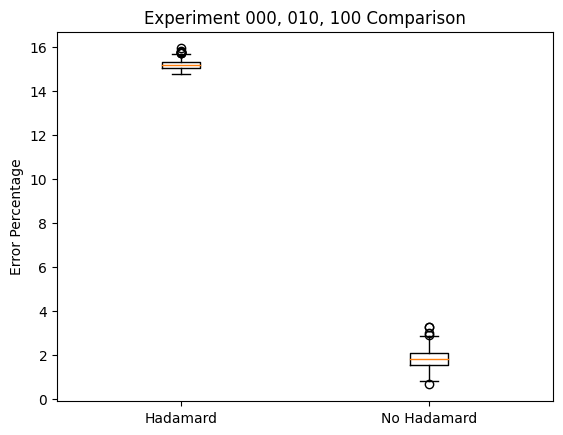

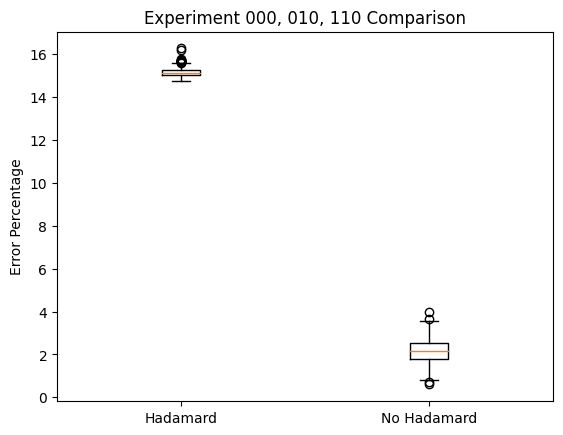

In [27]:
run_data = read_in_data()
plot_experiments(run_data)